In [4]:
import csv
import matplotlib.pyplot as plt
import numpy as np

'''
Задание 2. Часть 1 и 2
'''

class DayTrade(object):
    def __init__(self, ticker, per, date, time, close, vol):
        self.ticker = ticker
        self.per = per
        self.date = date
        self.time = time
        self.close = close
        self.vol = vol
    

def reader(path):
    days = []
    with open(path, 'r', encoding='utf=8') as file:
        reader = csv.DictReader(file, delimiter=';')
        for row in reader:
            days.append(DayTrade(*row.values()))
    return days

def data_creator(days):
    data = []
    result_data = []
    data.append(['TICKER', 'DATE', 'CLOSE', 'VOL'])
    
    for index in range(len(days)):  
        data.append([days[index].ticker, days[index].date, days[index].close, days[index].vol])
    fieldnames = data[0]
    
    for values in data[1:]:
        result_data.append(dict(zip(fieldnames, values)))
    
    return fieldnames, result_data

def writer(path, fieldnames, data):
    with open(path, 'w', newline='', encoding='utf=8') as output:
        writer = csv.DictWriter(output, delimiter=';', fieldnames=fieldnames)
        writer.writeheader()
        for row in data:
            writer.writerow(row)

input_path = 'Data_Day.csv'
output_path = 'Data_Day_noPerTime.csv'

days = reader(input_path)
fieldnames = data_creator(days)[0]
final_data = data_creator(days)[1]
writer(output_path, fieldnames, final_data)

In [7]:
import csv
import matplotlib.pyplot as plt
import numpy as np

'''
Задание 2. Часть 3
'''

class DayTrade(object):
    def __init__(self, ticker, date, close, vol):
        self.ticker = ticker
        self.date = date
        self.close = close
        self.vol = vol
        
        
def reader(path):
    days = []
    with open(path, 'r', encoding='utf=8') as file:
        reader = csv.DictReader(file, delimiter=';')
        for row in reader:
            days.append(DayTrade(*row.values()))
    return days


def writer(path, fieldnames, data):
    with open(path, 'w', newline='', encoding='utf=8') as output:
        writer = csv.DictWriter(output, delimiter=';', fieldnames=fieldnames)
        writer.writeheader()
        for row in data:
            writer.writerow(row)
           
        
def data_creator(days):
    data = []
    result_data = []
    data.append(['TICKER', 'DATE', 'CLOSE', 'VOL'])
    
    for index in range(len(days)):  
        data.append([days[index].ticker, days[index].date, days[index].close, days[index].vol])
    fieldnames = data[0]
    
    for values in data[1:]:
        result_data.append(dict(zip(fieldnames, values)))
    
    return fieldnames, result_data


input_path = 'Data_Day_noPerTime.csv'
days = reader(input_path)

SystemAO_name = 'Система ао'
SNG_name = 'Сургнфгз'
SNGP_name = 'Сургнфгз-п'

SAO = [SAO for SAO in days if SAO.ticker == SystemAO_name]
SNG = [SNG for SNG in days if SNG.ticker == SNG_name]
SNGP = [SNGP for SNGP in days if SNGP.ticker == SNGP_name]

SAO_field = data_creator(SAO)[0]
SAO_data = data_creator(SAO)[1]
SNG_field = data_creator(SNG)[0]
SNG_data = data_creator(SNG)[1]
SNGP_field = data_creator(SNGP)[0]
SNGP_data = data_creator(SNGP)[1]

SAO_path = 'SAO.csv'
SNG_path = 'SNG.csv'
SNGP_path = 'SNPG.csv'

writer(SAO_path, SAO_field, SAO_data)
writer(SNG_path, SNG_field, SNG_data)
writer(SNGP_path, SNGP_field, SNGP_data)



In [5]:
import csv
import matplotlib.pyplot as plt
import numpy as np

'''
Задание 2. Часть 4
'''

class DayTrade(object):
    def __init__(self, ticker, date, close, vol):
        self.ticker = ticker
        self.date = date
        self.close = float(close.replace(',', '.'))
        self.vol = float(vol)
        
    def set_logprice(self, log_price):
        self.logprice = log_price
        
    def set_logvol(self, log_vol):
        self.logvol = log_vol
        
    def set_profitability(self, profitability):
        self.profitability = profitability
        
    def set_log_profitability(self, log_profitability):
        self.log_profitability = log_profitability
        
    def set_relative_price(self, relative_price):
        self.relative_price = relative_price
    

def reader(path):
    days = []
    with open(path, 'r', encoding='utf=8') as file:
        reader = csv.DictReader(file, delimiter=';')
        for row in reader:
            days.append(DayTrade(*row.values()))
    return days


def writer(path, fieldnames, data):
    with open(path, 'w', newline='', encoding='utf=8') as output:
        writer = csv.DictWriter(output, delimiter=';', fieldnames=fieldnames)
        writer.writeheader()
        for row in data:
            writer.writerow(row)


def setter_logprice(days):
    for index in range(len(days)):
        days[index].set_logprice(np.log(days[index].close))
        
def setter_logvol(days):
    for index in range(len(days)):
        days[index].set_logvol(np.log(days[index].vol))
    
def setter_profitability(days):
    profitability = 0
    for index in range(len(days) - 1):
        profitability = (days[index].close - days[index+1].close) / days[index+1].close
        days[index].set_profitability(profitability)

def setter_log_profitability(days):
    log_profitability = 0
    for index in range(len(days) - 1):
        log_profitability = np.log(days[index].close / days[index+1].close)
        days[index].set_log_profitability(log_profitability)
        
def setter_relative_price(days):
    close_prices = [day.close for day in days]
    min_price = min(close_prices)
    max_price = max(close_prices)
    
    for index in range(len(days) - 1):
        relative_price = (days[index].close - min_price) / (max_price - min_price)
        days[index].set_relative_price(relative_price)
        
        
def data_creator(days):
    data = []
    result_data = []
    data.append(['TICKER', 'DATE', 'CLOSE', 'VOL', 'LOG_PRICE', 
                'PROFITABILITY', 'LOG_PROFITABILITY', 'LOG_VOL', 'RELATIVE_PRICE'])
    
    for index in range(len(days)):  
        data.append([days[index].ticker, days[index].date, days[index].close, days[index].vol, 
                    days[index].logprice, days[index].profitability, days[index].log_profitability,
                    days[index].logvol, days[index].relative_price])
    fieldnames = data[0]
    
    for values in data[1:]:
        result_data.append(dict(zip(fieldnames, values)))
    
    return fieldnames, result_data


if __name__ == "__main__":
    SAO_path = 'SAO.csv'
    SNG_path = 'SNG.csv'
    SNGP_path = 'SNPG.csv'
    
    SAO_days = reader(SAO_path)
    SNG_days = reader(SNG_path)
    SNGP_days = reader(SNGP_path)
    
    setter_logprice(SAO_days)
    setter_logprice(SNG_days)
    setter_logprice(SNGP_days)
    
    setter_logvol(SAO_days)
    setter_logvol(SNG_days)
    setter_logvol(SNGP_days)
    
    setter_profitability(SAO_days)
    setter_profitability(SNG_days)
    setter_profitability(SNGP_days)
    
    setter_log_profitability(SAO_days)
    setter_log_profitability(SNG_days)
    setter_log_profitability(SNGP_days)
    
    setter_relative_price(SAO_days)
    setter_relative_price(SNG_days)
    setter_relative_price(SNGP_days)
    
    del(SAO_days[-1])
    del(SNG_days[-1])
    del(SNGP_days[-1])
    
    SAO_field = data_creator(SAO_days)[0]
    SNG_field = data_creator(SNG_days)[0]
    SNGP_field = data_creator(SNGP_days)[0]
    
    SAO_data = data_creator(SAO_days)[1]
    SNG_data = data_creator(SNG_days)[1]
    SNGP_data = data_creator(SNGP_days)[1]
    
    SAO_path_out = 'SAO_out.csv'
    SNG_path_out = 'SNG_out.csv'
    SNGP_path_out = 'SNPG_out.csv'
    
    writer(SAO_path_out, SAO_field, SAO_data)
    writer(SNG_path_out, SNG_field, SNG_data)
    writer(SNGP_path_out, SNGP_field, SNGP_data)

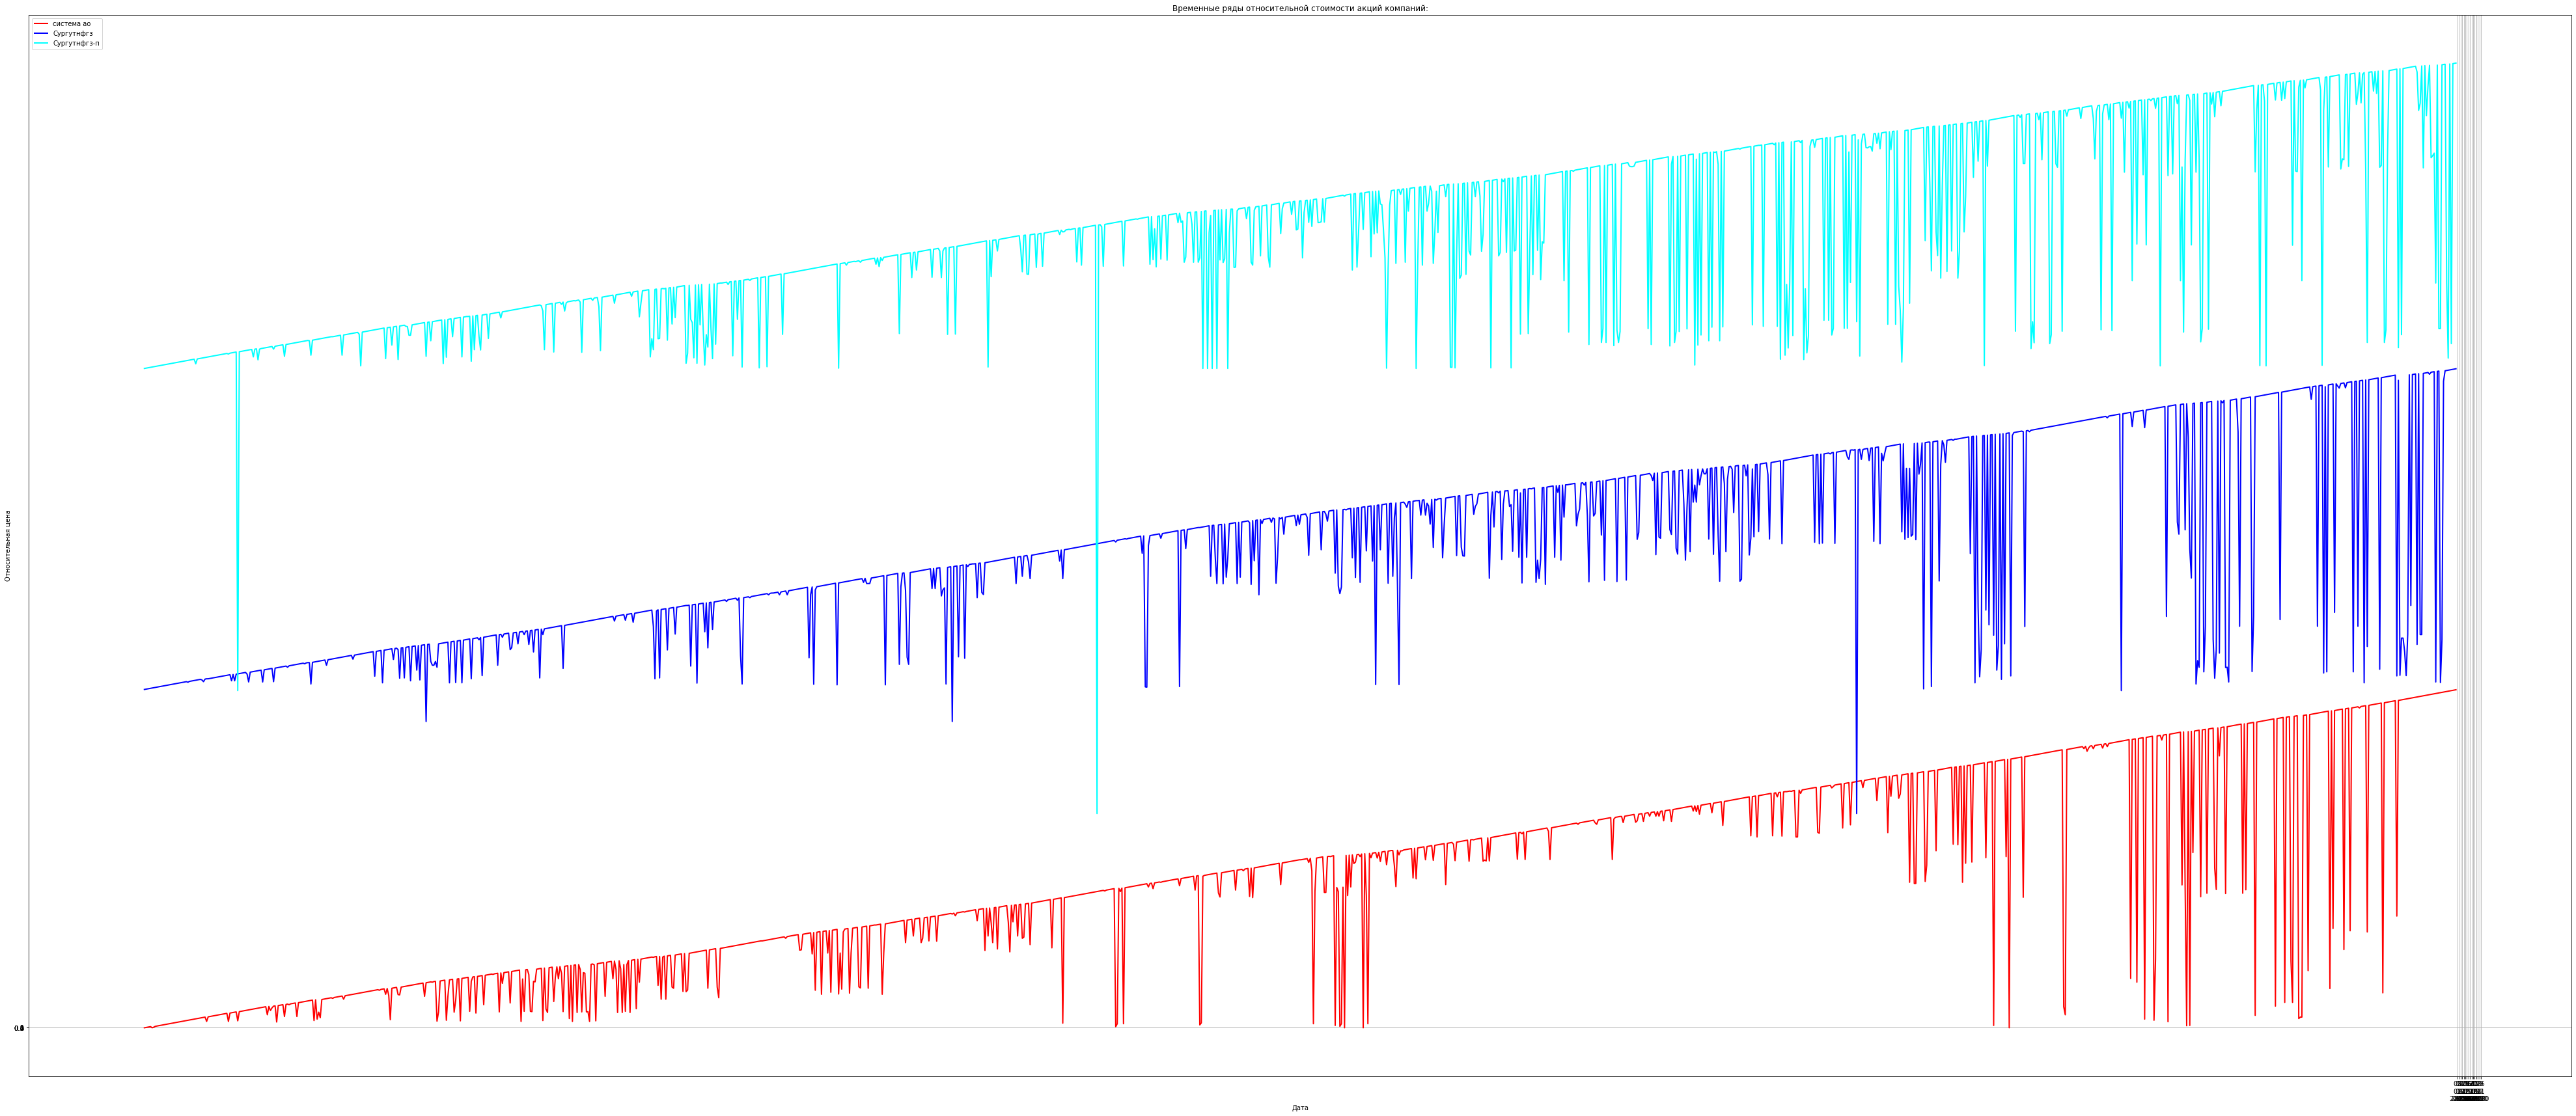

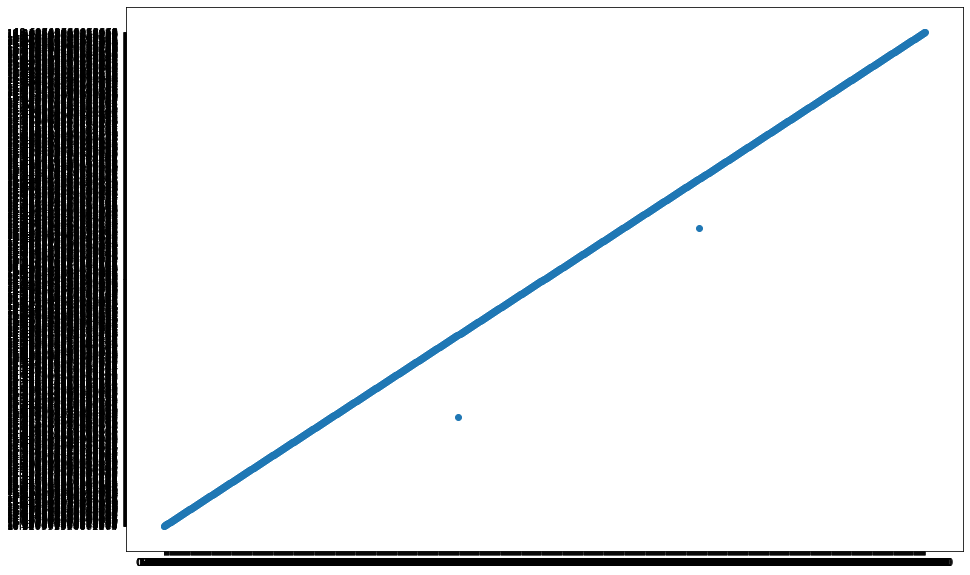

In [12]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

'''
Задание 2. Глава 3. Графики.
'''
class DayTrade(object):
    def __init__(self, ticker, date, close, vol, log_price, profitability, log_profitability,
                log_vol, relative_price):
        self.ticker = ticker
        self.date = date
        self.close = close
        self.vol = vol
        self.log_price = log_price
        self.profitability = profitability
        self.log_profitability = log_profitability
        self.log_vol = log_vol
        self.relative_price = relative_price

def reader(path):
    days = []
    with open(path, 'r', encoding='utf=8') as file:
        reader = csv.DictReader(file, delimiter=';')
        for row in reader:
            days.append(DayTrade(*row.values()))
    return days


if __name__ == "__main__":
    SAO_path_out = 'SAO_out.csv'
    SNG_path_out = 'SNG_out.csv'
    SNGP_path_out = 'SNPG_out.csv'
    
    SAO = reader(SAO_path_out)
    SNG = reader(SNG_path_out)
    SNGP = reader(SNGP_path_out)
    
    dates = [SAO_day.date for SAO_day in SAO]
    dates_ticks = [data.replace('.', '\n') for data in dates[::100]]
    dates_ticks.append(dates[-1].replace('.', '\n'))
    
    SAO_prices = [SAO_day.relative_price for SAO_day in SAO]
    SNG_prices = [SNG_day.relative_price for SNG_day in SNG]
    SNGP_prices = [SNGP_day.relative_price for SNGP_day in SNGP]
    
    SAO_log_vol = [SAO_day.log_vol for SAO_day in SAO]
    
    fig, ax = plt.subplots(figsize=(70, 30))
    plt.plot(dates, SAO_prices, label='система ао', color='red', linewidth=2)
    plt.plot(dates, SNG_prices, label='Сургутнфгз', color='blue', linewidth=2)
    plt.plot(dates, SNGP_prices, label='Сургутнфгз-п', color='cyan', linewidth=2)
    
    
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], ['0', '0.2', '0.4', '0.6', '0.8', '1'])
    plt.xticks(dates_ticks, dates_ticks)
    '''
    Здесь я самостоятельно указываю надписи на Ох и Оу, если их не указывать - matplotlib отрисует все
    надписи с 1500 значений данных. Как это исправить - не знаю.
    '''
    
    plt.xlabel('Дата')
    plt.ylabel('Относительная цена')
    plt.title('Временные ряды относительной стоимости акций компаний:')
    plt.legend(loc='upper left')
    plt.grid(True)
    
    
    '''
    Часть 2
    '''
    
    fig_one, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
    
    ax1.scatter(dates, SAO_log_vol)